<a href="https://colab.research.google.com/github/KiteVX/accent-vgg/blob/main/Accent_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# Import section
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import math, random

In [3]:
# Create a seed for reproducibility
seed = 1337
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed) 
random.seed(1337)
tf.random.set_seed(seed)

In [4]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
print("Downloading dataset... standby!")
!gdown https://drive.google.com/uc?id=1a5cN4GwzsngrpYP230hzM58I8BhtB8et #-> Core
#!gdown https://drive.google.com/uc?id=1NO1NKQSpyq3DMLEwiqA-BHIqXli8vtIL #-> Full extended

Downloading...
From: https://drive.google.com/uc?id=1a5cN4GwzsngrpYP230hzM58I8BhtB8et
To: /content/accentdb_core.tar.gz
100% 2.90G/2.90G [00:25<00:00, 114MB/s] 


In [6]:
print("Download complete! Extraction in progress...")
!tar -xvzf ./accentdb_core.tar.gz #Change name here...
print("Deleting tar!")
!rm -rf ./accentdb_core.tar.gz

Streaming output truncated to the last 5000 lines.
./data/bangla/speaker_02/bangla_s02_344.wav
./data/bangla/speaker_02/bangla_s02_345.wav
./data/bangla/speaker_02/bangla_s02_346.wav
./data/bangla/speaker_02/bangla_s02_347.wav
./data/bangla/speaker_02/bangla_s02_348.wav
./data/bangla/speaker_02/bangla_s02_349.wav
./data/bangla/speaker_02/bangla_s02_350.wav
./data/bangla/speaker_02/bangla_s02_351.wav
./data/bangla/speaker_02/bangla_s02_352.wav
./data/bangla/speaker_02/bangla_s02_353.wav
./data/bangla/speaker_02/bangla_s02_354.wav
./data/bangla/speaker_02/bangla_s02_355.wav
./data/bangla/speaker_02/bangla_s02_356.wav
./data/bangla/speaker_02/bangla_s02_324.wav
./data/bangla/speaker_02/bangla_s02_325.wav
./data/bangla/speaker_02/bangla_s02_326.wav
./data/bangla/speaker_02/bangla_s02_327.wav
./data/bangla/speaker_02/bangla_s02_328.wav
./data/bangla/speaker_02/bangla_s02_329.wav
./data/bangla/speaker_02/bangla_s02_330.wav
./data/bangla/speaker_02/bangla_s02_331.wav
./data/bangla/speaker_02/

In [7]:
!print("Downloading custom dataset...standby!")
!gdown https://drive.google.com/uc?id=1DK5MvtJu5vx_CW8dyfLAhDCfhX9wnKJ- #-> Custom

/bin/bash: -c: line 0: syntax error near unexpected token `"Downloading custom dataset...standby!"'
/bin/bash: -c: line 0: `print("Downloading custom dataset...standby!")'
Downloading...
From: https://drive.google.com/uc?id=1DK5MvtJu5vx_CW8dyfLAhDCfhX9wnKJ-
To: /content/TamilAudio (2).zip
100% 91.0M/91.0M [00:02<00:00, 43.5MB/s]


In [8]:
!print("Extraction in progress")
!unzip ./"TamilAudio (2).zip" -d ./data/Tamil

/bin/bash: -c: line 0: syntax error near unexpected token `"Extraction in progress"'
/bin/bash: -c: line 0: `print("Extraction in progress")'
Archive:  ./TamilAudio (2).zip
  inflating: ./data/Tamil/TamilAudio/1.wav  
  inflating: ./data/Tamil/TamilAudio/10.wav  
  inflating: ./data/Tamil/TamilAudio/100.wav  
  inflating: ./data/Tamil/TamilAudio/101.wav  
  inflating: ./data/Tamil/TamilAudio/102.wav  
  inflating: ./data/Tamil/TamilAudio/103.wav  
  inflating: ./data/Tamil/TamilAudio/104.wav  
  inflating: ./data/Tamil/TamilAudio/105.wav  
  inflating: ./data/Tamil/TamilAudio/106.wav  
  inflating: ./data/Tamil/TamilAudio/107.wav  
  inflating: ./data/Tamil/TamilAudio/108.wav  
  inflating: ./data/Tamil/TamilAudio/109.wav  
  inflating: ./data/Tamil/TamilAudio/11.wav  
  inflating: ./data/Tamil/TamilAudio/110.wav  
  inflating: ./data/Tamil/TamilAudio/111.wav  
  inflating: ./data/Tamil/TamilAudio/112.wav  
  inflating: ./data/Tamil/TamilAudio/113.wav  
  inflating: ./data/Tamil/TamilA

In [9]:
!pip install librosa

import librosa
import librosa.display
audio_data = './data/telugu/speaker_01/telugu_s01_745.wav'
x , sr = librosa.load(audio_data,sr=44100)
print(type(x), type(sr))
print(x.shape, sr)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'numpy.ndarray'> <class 'int'>
(220500,) 44100


In [10]:
import IPython.display as ipd

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

audio_fpath = "./data"
audio_clips = getListOfFiles(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  6303


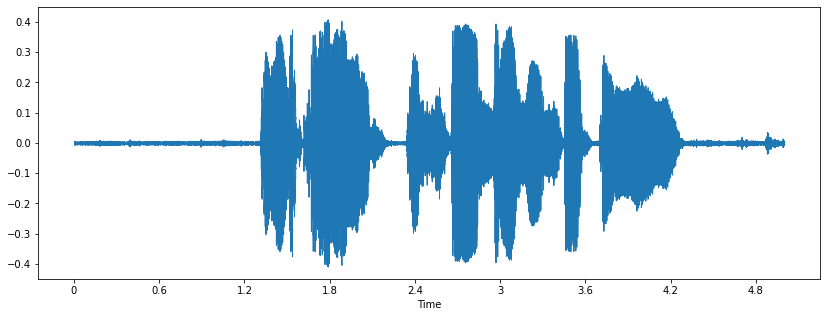

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display as ld
plt.figure(figsize=(14, 5))
ld.waveshow(x, sr=sr)

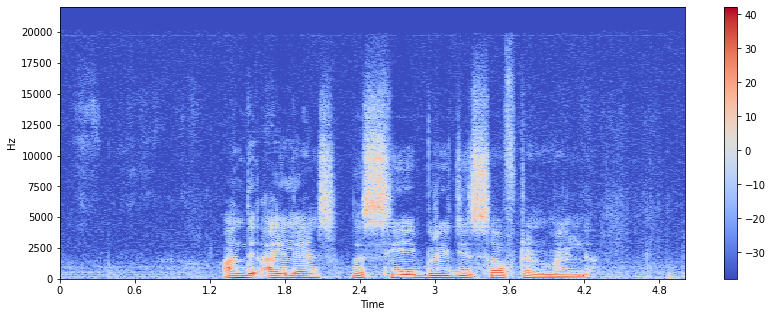

In [12]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

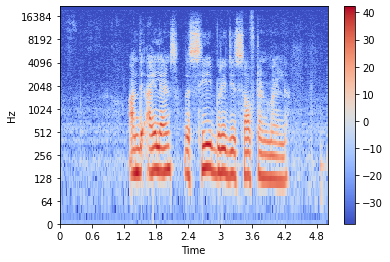

In [13]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

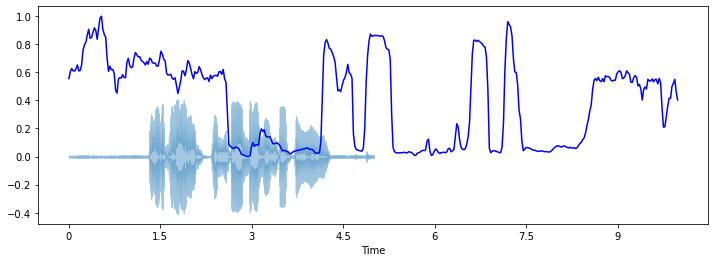

In [14]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

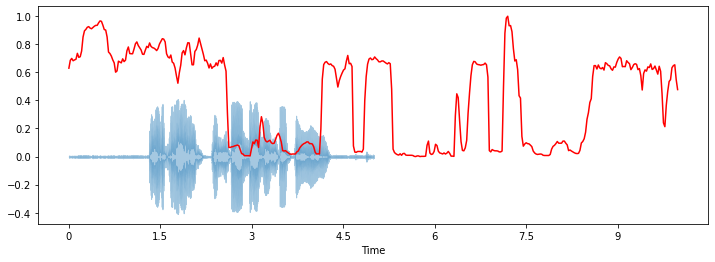

In [15]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

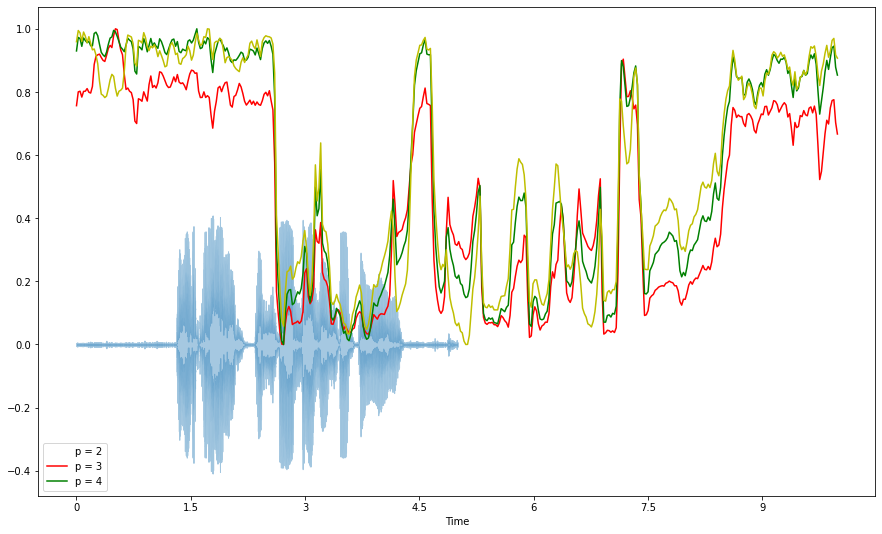

In [16]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

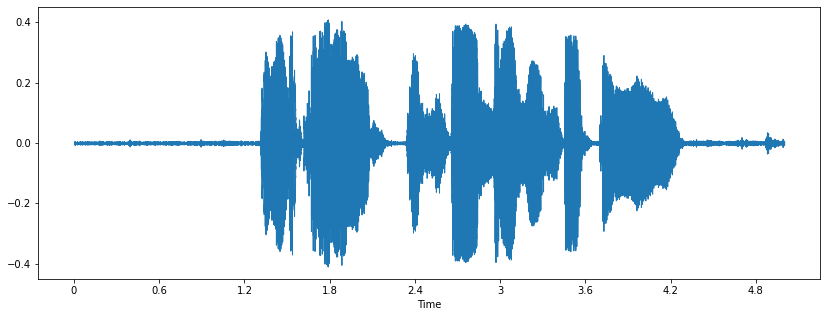

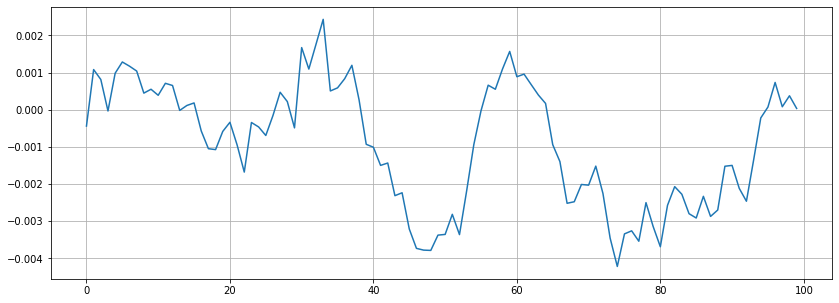

In [17]:
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [18]:
from scipy.io.wavfile import read
from os import walk
import time
print("Converting dataset.... This will take at least 10 minutes! Please wait!!")
if not os.path.exists("teluguPlot"):
    os.makedirs("teluguPlot")
if not os.path.exists("banglaPlot"):
    os.makedirs("banglaPlot")
if not os.path.exists("malayalamPlot"):
    os.makedirs("malayalamPlot")
if not os.path.exists("odiyaPlot"):
    os.makedirs("odiyaPlot")
if not os.path.exists("tamilPlot"):
    os.makedirs("tamilPlot")
files_size = 100

lang_wavs = []
i = 1
print("Converting set A-1")
for (_,_,filenames) in walk('data/telugu/speaker_01'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/telugu/speaker_01/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("teluguPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

time.sleep(1)

print("Converting set A-2")
lang_wavs = []
for (_,_,filenames) in walk('data/telugu/speaker_02'):
    lang_wavs.extend(filenames)
    break
i = 1
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/telugu/speaker_02/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("teluguPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1


Converting dataset.... This will take at least 10 minutes! Please wait!!
Converting set A-1
Converting set A-2


In [19]:
time.sleep(1)
print("Converting set B-1")
i = 1
lang_wavs = []
for (_,_,filenames) in walk('data/bangla/speaker_01'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/bangla/speaker_01/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("banglaPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

time.sleep(1)
print("Converting set B-2")
lang_wavs = []
i = 1
for (_,_,filenames) in walk('data/bangla/speaker_02'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/bangla/speaker_02/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("banglaPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1


Converting set B-1
Converting set B-2


In [20]:
time.sleep(1)
print("Converting set C-1")
lang_wavs = []
i = 1
for (_,_,filenames) in walk('data/malayalam/speaker_01'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/malayalam/speaker_01/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("malayalamPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

time.sleep(1)
print("Converting set C-2")
lang_wavs = []
i = 1
for (_,_,filenames) in walk('data/malayalam/speaker_02'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/malayalam/speaker_02/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("malayalamPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

Converting set C-1
Converting set C-2


In [21]:
time.sleep(1)
lang_wavs = []
print("Converting set D-1")
i = 1
for (_,_,filenames) in walk('data/odiya/speaker_01'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/odiya/speaker_01/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("odiyaPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

time.sleep(1)
lang_wavs = []
print("Converting set D-2")
i = 1
for (_,_,filenames) in walk('data/odiya/speaker_02'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/odiya/speaker_02/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("odiyaPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

Converting set D-1
Converting set D-2


In [25]:
time.sleep(1)
lang_wavs = []
print("Converting set E-1")
i = 1
for (_,_,filenames) in walk('data/Tamil/TamilAudio'):
    lang_wavs.extend(filenames)
    break
for wavs in lang_wavs:
    if(i!=files_size):
      # read audio samples
      input_data = read("./data/Tamil/TamilAudio/" + wavs)
      audio = input_data[1]
      # plot the first 1024 samples
      plt.plot(audio)
      # label the axes
      plt.ylabel("Amplitude")
      plt.xlabel("Time")
      # set the title
      # plt.title("Sample Wav")
      # display the plot
      plt.savefig("tamilPlot/" + wavs.split('.')[0] + '.png')
      # plt.show()
      plt.close('all')
      i = i + 1

Converting set E-1


In [26]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

X = []
y = []

lang1_plots = []
for (_,_,filenames) in os.walk('teluguPlot'):
    lang1_plots.extend(filenames)
    break

for aplot in lang1_plots:
    X.append(get_features('teluguPlot/' + aplot))
    y.append(0)

lang2_plots = []
for (_,_,filenames) in os.walk('banglaPlot'):
    lang2_plots.extend(filenames)
    break

for bplot in lang2_plots:
    X.append(get_features('banglaPlot/' + bplot))
    y.append(1)

lang3_plots = []
for (_,_,filenames) in os.walk('odiyaPlot'):
    lang3_plots.extend(filenames)
    break

for cplot in lang3_plots:
    X.append(get_features('odiyaPlot/' + cplot))
    y.append(2)

lang4_plots = []
for (_,_,filenames) in os.walk('malayalamPlot'):
    lang4_plots.extend(filenames)
    break

for dplot in lang4_plots:
    X.append(get_features('malayalamPlot/' + dplot))
    y.append(3)

lang5_plots = []
for (_,_,filenames) in os.walk('tamilPlot'):
    lang5_plots.extend(filenames)
    break

for dplot in lang5_plots:
    X.append(get_features('tamilPlot/' + dplot))
    y.append(4)

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

0.8080808080808081
